# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

Project 2 Team:
    
    RITHVIK MUNDRA
    
    RONGCHU ZHAO

We chose the Property Assessment data of Baton Rouge city of Lousiana state which is available at the following website:

https://data.brla.gov/Housing-and-Development/EBRP-Tax-Roll/myfc-nh6n

We are choosing this dataset because as a team we are interested in analyzing propoerty assessment data. The property assessment data for the Baton Rouge city is extensive and challenging to work on and hence we chose this data.

In [1]:
!wget https://data.brla.gov/api/views/myfc-nh6n/rows.csv?accessType=DOWNLOAD

--2016-11-11 00:39:02--  https://data.brla.gov/api/views/myfc-nh6n/rows.csv?accessType=DOWNLOAD
Resolving data.brla.gov (data.brla.gov)... 52.206.68.26
Connecting to data.brla.gov (data.brla.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                  ] 208.60M  5.18MB/s   in 47s    

Last-modified header invalid -- time-stamp ignored.
2016-11-11 00:39:49 (4.48 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [218738097]



Now renaming the file to baton.csv.

In [2]:
!mv rows.csv?accessType=DOWNLOAD baton.csv

Observing the column names in the data. 

In [190]:
!csvcut -n baton.csv

  1: TAX YEAR
  2: PROPERTY NUMBER
  3: ASSESSMENT TYPE
  4: ASSESSMENT STATUS
  5: TAXPAYER NAME
  6: TAXPAYER ADDRESS
  7: TAXPAYER SUBADDRESS
  8: TAXPAYER CITY STATE ZIP
  9: WARD
 10: SUBDIVISION NAME
 11: BLOCK/SQUARE NO
 12: LOT NO
 13: PHYSICAL ADDRESS
 14: STRUCTURE USE
 15: UNIT TYPE
 16: NO UNITS
 17: VACANT
 18: TRANSFER TYPE
 19: TRANSFER DATE
 20: ORIGINAL
 21: BUNDLE
 22: LEGAL DESCRIPTION
 23: RESTORATION TAX ABATEMENT
 24: HOMESTEAD EXEMPTION
 25: FAIR MARKET VALUE
 26: TOTAL ASSESSED VALUE
 27: HOMESTEAD EXEMPTION VALUE
 28: TAXABLE PARISH


Now finding the number of rows in the data.

In [191]:
!wc -l baton.csv

385718 baton.csv


The data has 385718 observations in the dataset. We need to minimize the amount of data to analyze so that huge data will not become a overhead to the VM or datanotebook.org.Hence we are choosing to analyze data of ward 2 and unit type as "lot".The reason we are chossing ward 2 and unit type as "lot" is that it will give us the reasonable amount of data and makes the data transactional.

In [4]:
!csvgrep -c9 -m '2' baton.csv | csvgrep -c15 -m 'LOT' > baton_prop.csv 

Now we are checking the number of observations in the file which contains transactional data of ward 2 and of unit type 'LOT'

In [5]:
!wc -l baton_prop.csv

25977 baton_prop.csv


Hence ward 2 and unit type 'LOT' data is reasonable and we can proceed with our analysis.

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

We use csvstat to get an idea about our dataset

In [192]:
!csvstat baton_prop.csv

  1. TAX YEAR
	<type 'int'>
	Nulls: False
	Values: 2015
  2. PROPERTY NUMBER
	<type 'unicode'>
	Nulls: False
	Unique values: 25976
	Max length: 14
  3. ASSESSMENT TYPE
	<type 'unicode'>
	Nulls: False
	Values: REAL PROPERTY, PUBLIC SERVICE
  4. ASSESSMENT STATUS
	<type 'unicode'>
	Nulls: False
	Values: ADJUDICATED, ACTUAL, EXEMPT
  5. TAXPAYER NAME
	<type 'unicode'>
	Nulls: False
	Unique values: 21310
	5 most frequent values:
		LLE WITH 4-PLEXES, L.L.C.:	104
		AMERICAN DEVLOPMENT COMPANY, LLC:	82
		CEDAR POINTE SUBDIVISION LIMITED:	81
		OAKWOOD TERRACE SUBDIVISION LIMITED:	61
		CITY - CITY OF ZACHARY:	58
	Max length: 36
  6. TAXPAYER ADDRESS
	<type 'unicode'>
	Nulls: True
	Unique values: 19958
	5 most frequent values:
		232-B LITTLE JOHN DR.:	115
		450 MAIN ST:	97
		1220 S RANGE AVE:	82
		1520 ROYAL PALM SQUARE BLVD., #360:	81
		12791 WORLD PLAZA LANE BLDG. 89:	63
	Max length: 36
  7. TAXPAYER SUBADDRESS
	<type 'unicode'>
	Nulls: True
	Unique values: 546
	5 most frequent values:
		6300 

#### Column meaning:
 
1. TAX YEAR: Indicates the year of the Tax Roll.

2. PROPERTY NUMBER : The unique property number assigned to each tax parcel.

3. ASSESSMENT TYPE : The type of assessment used to determine taxes.

4. ASSESSMENT STATUS : Taxing status of the parcel.

5. TAXPAYER NAME :Name of the taxpayer.

6. TAXPAYER ADDRESS : Mailing address of the taxpayer.

7. TAXPAYER SUBADDRESS : Mailing subaddress of the taxpayer.

8. TAXPAYER CITY STATE ZIP : Mailing city, state and ZIP code of the taxpayer.

9. WARD: Ward number of the tax parcel.

10. SUBDIVISION NAME: Name of the subdivision in which the tax parcel is located.

11. BLOCK/SQUARE NO :Block or square number in which the tax parcel is located.

12. LOT NO :Lot number of the tax parcel.

13. PHYSICAL ADDRESS :The physical or situs address of the tax parcel.

14. STRUCTURE USE: Type of use of the structure including commercial, residential or not determined.

15. UNIT TYPE: The type of unit on the tax parcel which may include a structure, lot, or acreage.

16. NO UNITS :Total number of structures attached to the tax parcel.

17. VACANT: Tax parcel with no structure attached.

18. TRANSFER TYPE: The transaction type of the last conveyance.

19. TRANSFER DATE: Date of last conveyance.

20. ORIGINAL: Clerk of Court filing system original number.

21. BUNDLE : Clerk of Court filing system bundle number.

22. LEGAL DESCRIPTION: Full legal description of the tax parcel.

23. RESTORATION TAX ABATEMENT: Determination whether the tax parcel has a property tax reduction for the renovation  of existing structures from a qualifying historic or economic development district.

24. HOMESTEAD EXEMPTION: Determination whether the tax parcel qualifies to receive a homestead exemption.

25. FAIR MARKET VALUE: FAIR MARKET VALUE. 

26. TOTAL ASSESSED VALUE: A percentage of the fair market value determined by the use of the property.

27. HOMESTEAD EXEMPTION VALUE: Homestead exemption amount for the tax parcel.

28. TAXABLE PARISH: The taxable amount for determining Parish taxes derived from the sum of land/acreage value and any improvement value minus any applicable homestead exemption. 

### Columns with Missing value:
 1. TAXPAYER ADDRESS: 168 missing values.
 
 2. TAXPAYER SUBADDRESS : 25088 missing values.
 
 3. SUBDIVISION NAME: 364 missing values.
 
 4. BLOCK/SQUARE NO : 24316 missing values.
 
 5. LOT NO: 521 missing values.
 
 6. PHYSICAL ADDRESS : 4889 missing values.
 
 7. TRANSFER TYPE: 3715 missing values.
 
 8. TRANSFER DATE: 3 missing values.
 
 9. ORIGINAL : 1928 missing values.
 
 10. BUNDLE: 1863 missing values.
 
The columns we are interested in are,ASSESMENT TYPE,ASSESSMENT STATUS,TAXPAYER NAME,TAXPAYER CITY STATE ZIP, STRUCTURE USE,VACANT,TRANSFER TYPE, TRANSFER DATE,FAIR MARKET VALUE,HOMESTEAD EXEMPTION VALUE,TOTAL ASSESSED VALUE AND TAXABLE PARISH because by analyzing these columns will give us some insights of property market.

So, there are some problematic columns. The first one is LOT NUMBER, few observations show the time value instead of showing the lot number. The second one is, SUBDIVISION NAME, which includes inaccurate data as it shows acreage instead of the subdivision name in several transactions. The third one is TRANSFER TYPE, which should only have detail about the type of transfer but few transactions have numerical value. 

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

Now we will connect to the POSTGRESql server

In [2]:
%load_ext sql

If you are using a VM please proceed with the following code to connect to POSTGREsql server

In [9]:
!createdb -U dbuser project2

createdb: database creation failed: ERROR:  database "project2" already exists


In [193]:
%sql postgresql://dbuser@localhost:5432/project2

'Connected: dbuser@project2'

If you are using DATANOTEBOOK.ORG please proceed with the following code to connect to POSTGREsql server

In [10]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [ ]:
!createdb -U dbuser project2

In [11]:
%sql postgresql://dbuser@localhost:5432/project2

'Connected: dbuser@project2'

Now we create an empty table named baton and load the data from the file baton_prop.csv to the baton table.

In [194]:
%%sql
DROP TABLE IF EXISTS baton;
CREATE TABLE baton (
    tax_year INTEGER,
    property_number VARCHAR(25),
    assessment_type VARCHAR(50),
    assessment_status VARCHAR(50),
    taxpayer_name VARCHAR(50),
    taxpayer_address VARCHAR(50),
    taxpayer_subaddress VARCHAR(50),
    taxpayer_city_state_zip VARCHAR(40),
    ward INTEGER,
    subdivision_name VARCHAR(40),
    block_square_no INTEGER,
    lot_no VARCHAR(10),
    physical_address VARCHAR(40),
    structure_use VARCHAR(40),
    unit_type VARCHAR(20),
    no_units INTEGER,
    vacant BOOLEAN,
    transfer_type VARCHAR(35),
    transfer_date TIMESTAMP,
    original INTEGER,
    bundel INTEGER,
    legal_description VARCHAR(1500),
    restoration_tax_abatement BOOLEAN,
    homestead_exemption BOOLEAN,
    fair_market_value MONEY,
    total_assessed_value MONEY,
    homestead_exemption_value MONEY,
    taxable_parish MONEY  
);

Done.
Done.


[]

In [195]:
!pwd

/home/rithvik/datamanagement/project2


For VM use the following code to load data into the table

In [197]:
%%sql

COPY baton FROM '/home/rithvik/datamanagement/project2/baton_prop.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

25976 rows affected.


[]

FOR DATANOTEBOOK.ORG we need to explicitly change the loaction where the file is downloaded to.
The location is '/home/jovyan/work/baton_prop.csv'

In [198]:
%%sql

SELECT COUNT(*) FROM baton;

1 rows affected.


count
25976


#### Deleting columns:

We are decided to remove column Ward and unit_type,because we are choosing ward=2 and unit_type ='LOT' data at the first step, so it does not have any significance and hence we remove the attribute ward. Secondly, we are removing column taxpayer_subaddress, tax_payer_address and block_square_no, because 95% of the values are missing and the information is overlapped with other columns, such as the taxpayer_state_city_zip. And removing physical_address, because the as stated earlier the taxpayer_state_city_zip is covering the location infromation, so removing the physica_address. Then, removing columns lot_no, subdivision_name and no_units because we feel that all attributes will not help us significantly in analyzing the data and there are some data quality issues like missing data and illogical records. After that, removing the column bundel, origina and legal_description, because we think all attributes would not give us significant meaning and too many columns are a little bit overhead for us. Moreover, we are removing the column homestead_exemption and column restoration_tax_abatement becasue we only want to analyze the assessment value and fair market value of a property, so we decide to remove these two columns. Finally, removing the column tax_year because the data is collected in the year 2015 and hence this attribute has same value for all observations.

In [199]:
%%sql
ALTER TABLE baton
DROP COLUMN ward, DROP COLUMN taxpayer_subaddress,DROP COLUMN block_square_no, DROP COLUMN lot_no, DROP COLUMN subdivision_name, DROP COLUMN tax_year,DROP COLUMN unit_type,DROP COLUMN taxpayer_address,DROP COLUMN no_units,DROP COLUMN original,DROP COLUMN bundel, DROP COLUMN restoration_tax_abatement,DROP COLUMN homestead_exemption,DROP COLUMN physical_address;

Done.


[]

Updating missing values in Transfer_type column to "N/A"

In [200]:
%%sql

UPDATE baton
SET transfer_type=trim(transfer_type);

25976 rows affected.


[]

In [201]:
%%sql

UPDATE baton
set transfer_type='N/A'
WHERE transfer_type='';

3715 rows affected.


[]

Now removing the null values from the transfer_date column and assigning "9999-09-09" as the default date for the records with missing date values.

In [202]:
%%sql

UPDATE baton
set transfer_date='9999-09-09'
WHERE transfer_date IS NULL;

3 rows affected.


[]

Looking at the metadata of the baton table which we created, looks fine and continue processing.

In [203]:
%%sql

SELECT column_name,data_type
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name='baton';

14 rows affected.


column_name,data_type
property_number,character varying
assessment_type,character varying
assessment_status,character varying
taxpayer_name,character varying
taxpayer_city_state_zip,character varying
structure_use,character varying
vacant,boolean
transfer_type,character varying
transfer_date,timestamp without time zone
legal_description,character varying


#### EXPLORING THE DATA

In [204]:
%%sql

SELECT assessment_type, COUNT(property_number) AS "Number of Assessments"
FROM baton
GROUP BY assessment_type;

2 rows affected.


assessment_type,Number of Assessments
REAL PROPERTY,25966
PUBLIC SERVICE,10


Exploring the data, we found majority of the assessment is real property. It also shows that assessment_type could be our candidate for dimension table. 

In [205]:
%%sql

SELECT taxpayer_name, COUNT(property_number) AS "Number of Properties"
FROM baton 
GROUP BY taxpayer_name
ORDER BY COUNT(property_number) DESC
LIMIT 10;

10 rows affected.


taxpayer_name,Number of Properties
"LLE WITH 4-PLEXES, L.L.C.",104
"AMERICAN DEVLOPMENT COMPANY, LLC",82
CEDAR POINTE SUBDIVISION LIMITED,81
OAKWOOD TERRACE SUBDIVISION LIMITED,61
CITY - CITY OF ZACHARY,58
"FIRST HORIZON, INC.",47
"DSLD HOMES, LLC",44
"DSLD, L.L.C.",40
"CITY - CITY OF BAKER, LA.",40
HOSPITALS - HOSPITAL SERVICE DIST. 1,39


Here we found the top 10 property owners and list them each with their property number. Again, we think the taxpayer information could be a good candidate of dimension. 

In [206]:
%matplotlib inline

<Container object of 10 artists>

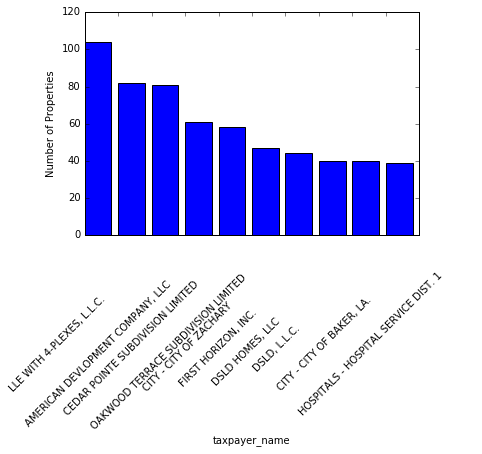

In [207]:
result=_
result.bar()

Finding the total tax paid by top 10 tax payers

In [208]:
%%sql

SELECT taxpayer_name, SUM(fair_market_value) AS "Total Market Value",SUM(taxable_parish) AS "Total Taxable Parish"
FROM baton 
GROUP BY taxpayer_name
ORDER BY COUNT(property_number) DESC
LIMIT 10;

10 rows affected.


taxpayer_name,Total Market Value,Total Taxable Parish
"LLE WITH 4-PLEXES, L.L.C.","$276,000.00","$27,600.00"
"AMERICAN DEVLOPMENT COMPANY, LLC","$1,830,000.00","$183,000.00"
CEDAR POINTE SUBDIVISION LIMITED,"$484,500.00","$48,450.00"
OAKWOOD TERRACE SUBDIVISION LIMITED,"$361,000.00","$36,100.00"
CITY - CITY OF ZACHARY,"$690,000.00","$69,000.00"
"FIRST HORIZON, INC.","$671,000.00","$67,100.00"
"DSLD HOMES, LLC","$1,870,000.00","$187,000.00"
"DSLD, L.L.C.","$1,445,000.00","$144,500.00"
"CITY - CITY OF BAKER, LA.","$919,000.00","$91,900.00"
HOSPITALS - HOSPITAL SERVICE DIST. 1,"$3,022,000.00","$302,200.00"


Here, we list the total tax paid by top 10 tax payers and comparing with total market value for each taxpayer. We can find that all top 10 taxpayers need to pay 10% of the value of market value of the property, which means there are no exemption for them. 

In [209]:
%%sql

SELECT transfer_type, COUNT(property_number) AS "Number of Properties"
FROM baton 
GROUP BY transfer_type
ORDER BY COUNT(property_number) DESC
LIMIT 10;

10 rows affected.


transfer_type,Number of Properties
Cash Sale,15322
N/A,3715
Sale with Mortgage,1540
Judgement of Possession,1014
Sale with Assumption,731
DONATION,628
TRANSFER,493
Adjudicated,372
Tax Redemption,298
Tax Deed,282


After dealing with missing value in column transfer_type, we can using query to see for each transfer type how many transfer happened for the use of property transfer. So, we found transfer_type also could be a good candidate for dimension.

Finding the trend of last 15 years

In [210]:
%%sql

SELECT EXTRACT (YEAR FROM transfer_date), COUNT(property_number) AS "Number of Properties Transferred"
FROM baton 
WHERE EXTRACT (YEAR FROM transfer_date)<>'9999'
GROUP BY EXTRACT (YEAR FROM transfer_date)
ORDER BY EXTRACT (YEAR FROM transfer_date) DESC,COUNT(property_number) DESC
LIMIT 15;

15 rows affected.


date_part,Number of Properties Transferred
2015.0,488
2014.0,1236
2013.0,976
2012.0,908
2011.0,723
2010.0,632
2009.0,733
2008.0,852
2007.0,1046
2006.0,1199


We are listing the top 10 years with highest number of transacation that based on property. This will give us a clear trend among each year, so we decide to seperate this column from main data table to form a new dimension. 

<Container object of 15 artists>

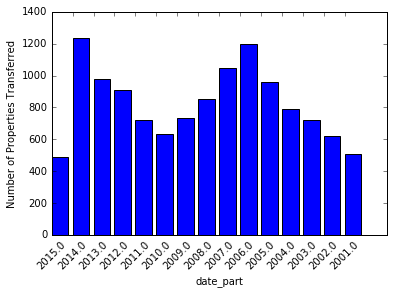

In [211]:
result=_
result.bar()

After several explortions, we decided to put column fair_market_value, total_assessed_value, homestead_exemption_value , taxable_parish and porperty_number to our fact table as the fact we want to measure because they are numeric and will give us some insights when aggregating them based on different dimensions. Column property_number is unique for each observations in our data, so it will be a good fit for adding it in the fact table. Column transfer_date and transfer_type will be one dimension, because we think it will give us the information about the transfer, so it makes good sense to put them in one dimension. Furthermore, we will put assessment_type and assessment_status to another dimension table. It will give us the information about the type of assessment. Other than that, we will put taxpayer_name and taxpayer_state,city,zip to another dimension table. Structure_use and vacant will form a dimension table, which includes the information about the property. 

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

In [212]:
from IPython.display import Image
Image(url="https://github.com/gwsb-istm-6212-fall-2016/Rongchu-Zhao/raw/master/SS.png")

Here is the star schema that we created for our data.

Dimension tables store the description of the characteritics of our facts. So, we think the transfer_type and transfer_date could give us information about the tranfer of each property. Taxpayer Dimension will tell us the name and location of a property's taxpayer.
Assessment Dimension describes the assessment information about each property.
Structure Dimension inlcudes the characteritic of structure type of each property and whether this property is vacant or not. 


Now creating the Dimension & Fact Tables

First, creating the assessment dimension table by selecting all unique combinations of assessment_type and assessment_status. After that, loading the data into this dimension table.


In [213]:
%%sql

DROP TABLE IF EXISTS assessment CASCADE;
CREATE TABLE assessment(
    assessment_id SERIAL PRIMARY KEY,
    assessment_type VARCHAR(30),
    assessment_status VARCHAR(20)
);

Done.
Done.


[]

In [214]:
%%sql

INSERT INTO assessment (assessment_type, assessment_status)
SELECT DISTINCT assessment_type, assessment_status FROM baton;

4 rows affected.


[]

In [215]:
%%sql

SELECT * FROM assessment;

4 rows affected.


assessment_id,assessment_type,assessment_status
1,REAL PROPERTY,ADJUDICATED
2,REAL PROPERTY,ACTUAL
3,REAL PROPERTY,EXEMPT
4,PUBLIC SERVICE,ACTUAL


Checking the assessment table.Looks right and then create the structure dimension table and load data into it.

In [216]:
%%sql

DROP TABLE IF EXISTS structure CASCADE;
CREATE TABLE structure(
    structure_id SERIAL PRIMARY KEY,
    structure_use VARCHAR(30),
    vacant BOOLEAN
);

Done.
Done.


[]

In [217]:
%%sql

INSERT INTO structure (structure_use, vacant)
SELECT DISTINCT structure_use, vacant FROM baton;

6 rows affected.


[]

In [218]:
%%sql

SELECT * FROM structure;

6 rows affected.


structure_id,structure_use,vacant
1,COMMERCIAL,False
2,COMMERCIAL,True
3,RESIDENTIAL,False
4,NOT DETERMINED,False
5,RESIDENTIAL,True
6,NOT DETERMINED,True


Then creating the taxpayer dimension table.

In [219]:
%%sql

DROP TABLE IF EXISTS taxpayer CASCADE;
CREATE TABLE taxpayer(
    taxpayer_id SERIAL PRIMARY KEY,
    taxpayer_name VARCHAR(50),
    taxpayer_city VARCHAR(50),
    taxpayer_state CHAR(20),
    taxpayer_zipcode VARCHAR(20)
);

Done.
Done.


[]

The column taxpayer_city_state_zip contain three part information, so we want to seperate them to each columns in our dimension table.We are writing the below code to correctly extract the city,state and zipcode from the attribute taxpayer_city_state_zip. It was quite challenging to use many complex querry functions like SPLIT_PART,REVERSE,SUBSTRING,TRIM and RIGHT to get the desired output.

In [220]:
%%sql

INSERT INTO taxpayer(taxpayer_name,taxpayer_city,taxpayer_state,taxpayer_zipcode)
SELECT DISTINCT taxpayer_name,split_part(taxpayer_city_state_zip,' ',1),REVERSE(SUBSTRING(REVERSE(TRIM(taxpayer_city_state_zip)),8,2)),RIGHT(TRIM(taxpayer_city_state_zip),5)
FROM baton

21439 rows affected.


[]

In [221]:
%%sql
SELECT * FROM taxpayer
LIMIT 10;

10 rows affected.


taxpayer_id,taxpayer_name,taxpayer_city,taxpayer_state,taxpayer_zipcode
1,"SHILLING, DARLENE FRANK",BAKER,LA,70714
2,"TANNER, KEAVIN L. & AMY D.",ZACHARY,LA,70791
3,"JOHNSON, BRYANT KEITH & SHARELLE",ZACHARY,LA,70791
4,"GRANT, GREGORY STEVEN & ROSALIND",BAKER,LA,70714
5,"THOMPSON, ROBERT MILLS, SR. &",ZACHARY,LA,70791
6,"JONES, LOUIS W., SR.",BAKER,LA,70714
7,"MYER, GEORGE DERAN & CAROLYN",BAKER,LA,70714
8,"JAMES, ANITTA",BATON,LA,70811
9,"LEE, ROSEMARY",GREENWELL,LA,70739
10,"MCMANUS, SANDRA ELIZABETH",ZACHARY,LA,70791


In [222]:
%%sql

DROP TABLE IF EXISTS transfer CASCADE;
CREATE TABLE transfer(
    transfer_id SERIAL PRIMARY KEY,
    transfer_type VARCHAR(30),
    transfer_year INTEGER,
    transfer_month INTEGER,
    transfer_day INTEGER
);

Done.
Done.


[]

In [223]:
%%sql

INSERT INTO transfer (transfer_type, transfer_year, transfer_month, transfer_day)
SELECT DISTINCT transfer_type,
EXTRACT (year FROM transfer_date), EXTRACT (month FROM transfer_date), EXTRACT(day FROM transfer_date)
FROM baton;

11716 rows affected.


[]

In [224]:
%%sql

SELECT * FROM transfer
LIMIT 10;

10 rows affected.


transfer_id,transfer_type,transfer_year,transfer_month,transfer_day
1,Sheriff Sale,2001,4,16
2,Cash Sale,1995,9,21
3,DONATION,1987,2,11
4,Sale with Mortgage,1997,7,11
5,DONATION,1992,6,5
6,Cash Sale,2005,6,3
7,Cash Sale,2000,11,9
8,N/A,1980,1,21
9,Cash Sale,2012,6,5
10,Cash Sale,2014,4,3


Then creating the fact table.

In [225]:
%%sql
DROP TABLE IF EXISTS fact;
CREATE TABLE fact as
SELECT * from baton

Done.
25976 rows affected.


[]

We are selecting all records from original table and loading thoes records into fact table. After that we create 4 new columns into it, which will hold each dimension key value. Then,set  each key column equals to the each dimension key and specify some conditions to match all records with each dimension key that we create before. Finally, deleting all irrelative columns. 

In [226]:
%%sql

ALTER TABLE fact 
ADD COLUMN assessment_KEY INTEGER,
ADD COLUMN structure_KEY INTEGER,
ADD COLUMN transfer_KEY INTEGER,
ADD COLUMN taxpayer_KEY INTEGER;

Done.


[]

In [227]:
%%sql

UPDATE fact AS f
SET assessment_KEY=assessment_id
FROM assessment AS a
WHERE f.assessment_type=a.assessment_type AND f.assessment_status=a.assessment_status

25976 rows affected.


[]

In [228]:
%%sql

UPDATE fact AS f
SET structure_KEY= structure_id
FROM structure AS s
WHERE f.structure_use = s.structure_use AND f.vacant = s.vacant;

25976 rows affected.


[]

In [229]:
%%sql

UPDATE fact AS f
SET taxpayer_KEY=taxpayer_id
FROM taxpayer AS t
WHERE f.taxpayer_name = t.taxpayer_name 

25976 rows affected.


[]

In [230]:
%%sql

UPDATE fact AS f
SET transfer_KEY=transfer_id
FROM transfer AS t
WHERE EXTRACT(YEAR FROM f.transfer_date)=t.transfer_year AND 
EXTRACT(MONTH FROM f.transfer_date)=t.transfer_month AND
EXTRACT(DAY FROM f.transfer_date)=t.transfer_day;

25976 rows affected.


[]

After several previous cells we are checking wether each records were matched with each keys.

In [231]:
%%sql

SELECT * FROM fact
LIMIT 5;

5 rows affected.


property_number,assessment_type,assessment_status,taxpayer_name,taxpayer_city_state_zip,structure_use,vacant,transfer_type,transfer_date,legal_description,fair_market_value,total_assessed_value,homestead_exemption_value,taxable_parish,assessment_key,structure_key,transfer_key,taxpayer_key
003-9756-3,REAL PROPERTY,ACTUAL,"THOMPSON, BERNELL",ZACHARY LA 70791,RESIDENTIAL,False,Cash Sale,1993-04-26 00:00:00,"Ward 2-5 #2649, Lot: 9, Subdiv: CASTLE PLACE. 1ST FILING, SEC. 1. RESUB. 1983","$2,500.00",$250.00,$0.00,$250.00,2,3,5156,16238
012-9845-3,REAL PROPERTY,ACTUAL,"HILTON, CURTIS D., SR.",BATON ROUGE LA 70811,RESIDENTIAL,False,Cash Sale,2010-09-21 00:00:00,"Ward 2-1 #5274, Lot: 71, Subdiv: CEDAR GLEN.","$10,000.00","$1,000.00",$0.00,"$1,000.00",2,3,9643,21232
000-1393-5,REAL PROPERTY,ACTUAL,"HAYNES & HAYNES, L.L.C.",CLINTON LA 70722,RESIDENTIAL,True,Adjudicated,1999-06-14 00:00:00,"Ward 2-5 #1190, Lot: X-5, Subdiv: CHANEY, L. L. TRACT. TRACT X-5 CONT. 0.37 ACRES RESUB. OF 200 ACRES, MORE OR LESS, BEING PART OF MRS. L. L. CHANEY 300 ACRE TRACT IN SECS. 42 & 22, T4S, R1E. 1989. MAP.","$1,000.00",$100.00,$0.00,$100.00,2,5,11302,8671
013-3836-6,REAL PROPERTY,ACTUAL,"MONTGOMERY, WILMAN FRANK &",BATON ROUGE LA 70811,RESIDENTIAL,False,Sale with Mortgage,1977-01-01 00:00:00,"Ward 2-1 #7942, Lot: 76, Subdiv: HOLIDAY WOODS.","$6,000.00",$600.00,$600.00,$0.00,2,3,8077,9107
001-8801-8,REAL PROPERTY,ACTUAL,"A AND C RENOVATIONS, LLC",PRAIRIEVILLE LA 70769,RESIDENTIAL,False,Cash Sale,2011-07-27 00:00:00,"Ward 2-1 #1, Lot: 328-B, Subdiv: KILDARE. CONT. 1.26 ACRES BEING A RESUB. OF LOTS 328-A-1 & 328-B-1. RESUB. 1988. SEC. 3.","$10,000.00","$1,000.00",$0.00,"$1,000.00",2,3,5178,15043


Now removing unwanted columns from the fact table.

In [232]:
%%sql

ALTER TABLE fact
DROP COLUMN assessment_type,
DROP COLUMN assessment_status,
DROP COLUMN taxpayer_name,
DROP COLUMN taxpayer_city_state_zip,
DROP COLUMN structure_use,
DROP COLUMN vacant,
DROP COLUMN transfer_type,
DROP COLUMN transfer_date,
DROP COLUMN legal_description;

Done.


[]

In [233]:
%%sql

SELECT * FROM fact
LIMIT 5;

5 rows affected.


property_number,fair_market_value,total_assessed_value,homestead_exemption_value,taxable_parish,assessment_key,structure_key,transfer_key,taxpayer_key
013-3836-6,"$6,000.00",$600.00,$600.00,$0.00,2,3,8077,9107
001-8801-8,"$10,000.00","$1,000.00",$0.00,"$1,000.00",2,3,5178,15043
004-0430-6,"$16,000.00","$1,600.00",$0.00,"$1,600.00",2,6,3573,15855
004-0521-3,"$50,000.00","$5,000.00",$0.00,"$5,000.00",2,3,5877,3131
005-0496-3,"$7,000.00",$700.00,$0.00,$700.00,2,3,9381,9096


Now we are creating a new table for changing the column positions such that all the surrogate keys are in order and are followed by the measurable facts.

In [234]:
%%sql

DROP TABLE IF EXISTS property_fact;
CREATE TABLE property_fact AS
SELECT property_number,taxpayer_KEY,assessment_key,structure_KEY,transfer_KEY,fair_market_value,total_assessed_value,homestead_exemption_value,taxable_parish
FROM fact;

Done.
25976 rows affected.


[]

In [235]:
%%sql

SELECT * FROM property_fact
LIMIT 5;

5 rows affected.


property_number,taxpayer_key,assessment_key,structure_key,transfer_key,fair_market_value,total_assessed_value,homestead_exemption_value,taxable_parish
005-0496-3,9096,2,3,9381,"$7,000.00",$700.00,$0.00,$700.00
006-4288-6,19849,2,3,9275,"$8,000.00",$800.00,$0.00,$800.00
006-6616-5,5909,2,3,8799,"$10,000.00","$1,000.00",$0.00,"$1,000.00"
013-6349-2,21051,2,3,4184,"$1,000.00",$100.00,$0.00,$100.00
007-2988-4,12539,2,3,6824,"$20,000.00","$2,000.00",$0.00,"$2,000.00"


Now we are creating the Foreign Key references for the surrogate keys in the property_fact table.

In [236]:
%%sql

ALTER TABLE property_fact
ADD CONSTRAINT taxpayer_fk
FOREIGN KEY(taxpayer_KEY)
REFERENCES taxpayer
ON DELETE CASCADE;

Done.


[]

In [237]:
%%sql

ALTER TABLE property_fact
ADD CONSTRAINT assessment_fk
FOREIGN KEY(assessment_KEY)
REFERENCES assessment
ON DELETE CASCADE;

Done.


[]

In [238]:
%%sql

ALTER TABLE property_fact
ADD CONSTRAINT transfer_fk
FOREIGN KEY (transfer_KEY)
REFERENCES transfer
ON DELETE CASCADE;

Done.


[]

In [239]:
%%sql

ALTER TABLE property_fact
ADD CONSTRAINT structure_fk
FOREIGN KEY(structure_KEY)
REFERENCES structure
ON DELETE CASCADE;

Done.


[]

Now, we finished the creating our star schema. 

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

Latest 15 years how many transfers took place?

In [240]:
%%sql

SELECT t.transfer_year,COUNT(p.property_number)
FROM property_fact p LEFT JOIN transfer t ON p.transfer_KEY=t.transfer_id
WHERE t.transfer_year<> '9999'
GROUP BY t.transfer_year
ORDER BY t.transfer_year DESC
LIMIT 15;

15 rows affected.


transfer_year,count
2015,488
2014,1236
2013,976
2012,908
2011,723
2010,632
2009,733
2008,852
2007,1046
2006,1199


What are the top 10 zip codes with high average market value?

In [241]:
%%sql

SELECT t.taxpayer_zipcode,AVG(CAST(p.fair_market_value AS numeric)) AS "Avg Market Value"
FROM property_fact p LEFT JOIN taxpayer t on p.taxpayer_key=t.taxpayer_id
GROUP BY t.taxpayer_zipcode
ORDER BY avg(cast(p.fair_market_value AS numeric)) DESC
LIMIT 10;

10 rows affected.


taxpayer_zipcode,Avg Market Value
50392,1300000.000000000000
80120,1012000.000000000000
72716,1000000.000000000000
07013,915000.000000000000
92046,850000.000000000000
85038,800000.000000000000
35804,689500.000000000000
94404,650000.000000000000
02895,637500.000000000000
71731,625000.000000000000


Is there any difference in the market value for the Vacant and Non Vacant properties?

In [242]:
%%sql

SELECT s.vacant, AVG(CAST(p.fair_market_value AS numeric)) AS "Avg Market Value"
FROM property_fact p LEFT JOIN structure s ON s.structure_id=p.structure_key
GROUP BY s.vacant
ORDER BY AVG(CAST(p.fair_market_value AS numeric)) DESC;

2 rows affected.


vacant,Avg Market Value
True,20177.187222715173
False,17455.432377955853


From previous cells we can see that the vacant property has a relativley high average market values compare to non-vacant property.

([<matplotlib.patches.Wedge at 0x7fc40051c2b0>,
  <matplotlib.text.Text at 0x7fc4004a2748>])

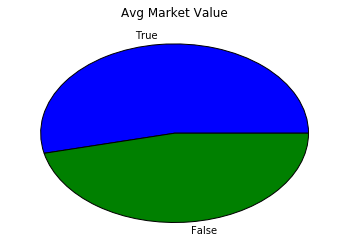

In [243]:
result=_
result.pie()

Give a breakdown on the number of assessments of each type and status

In [244]:
%%sql

SELECT a.assessment_type,a.assessment_status,COUNT(property_number)
FROM property_fact p LEFT JOIN assessment a 
ON p.assessment_key=a.assessment_id
GROUP BY a.assessment_type,a.assessment_status
ORDER BY COUNT(property_number) DESC ;

4 rows affected.


assessment_type,assessment_status,count
REAL PROPERTY,ACTUAL,24809
REAL PROPERTY,EXEMPT,743
REAL PROPERTY,ADJUDICATED,414
PUBLIC SERVICE,ACTUAL,10


Check if there exists any seasonality in the tranfer months.

In [245]:
%%sql

SELECT t.transfer_month,COUNT(property_number)
FROM property_fact p LEFT JOIN transfer t 
ON p.transfer_key=t.transfer_id
GROUP BY t.transfer_month
ORDER BY t.transfer_month;

12 rows affected.


transfer_month,count
1,5127
2,1447
3,1824
4,1912
5,2109
6,2073
7,2117
8,2153
9,1793
10,1847


<Container object of 12 artists>

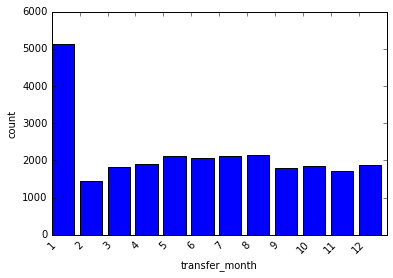

In [246]:
result=_
result.bar()

We can see that there is some seasonality in transfers in the month of January.In the month of January total 5127 times tranfers took place in all the years whereas in other month only apporximately 1000-2000 transfers took place.   

Top 5 cities with highest asset values in 2015

In [249]:
%%sql

SELECT t.taxpayer_city, SUM(p.fair_market_value) 
FROM transfer tf LEFT JOIN property_fact p ON tf.transfer_id=p.transfer_key
LEFT JOIN taxpayer t
ON p.taxpayer_key=t.taxpayer_id
WHERE tf.transfer_year=2015 AND t.taxpayer_city IS NOT NULL
GROUP BY t.taxpayer_city
ORDER BY SUM(p.fair_market_value) DESC
LIMIT 5;

5 rows affected.


taxpayer_city,sum
ZACHARY,"$8,624,500.00"
BATON,"$1,109,000.00"
BAKER,"$584,000.00"
NEW,"$177,000.00"
JACKSON,"$105,000.00"


Which Cities pays the highest tax? 

In [250]:
%%sql

SELECT t.taxpayer_city, SUM(p.taxable_parish) 
FROM property_fact p LEFT JOIN taxpayer t
ON p.taxpayer_key=t.taxpayer_id
WHERE t.taxpayer_city IS NOT NULL
GROUP BY t.taxpayer_city
ORDER BY SUM(p.taxable_parish) DESC
LIMIT 5;

5 rows affected.


taxpayer_city,sum
ZACHARY,"$19,060,850.00"
BATON,"$8,936,765.00"
BAKER,"$4,990,400.00"
DENHAM,"$731,650.00"
GREENWELL,"$712,350.00"


We can do the above querry by connecting to python also using psycopyg2 package 

In [251]:
import psycopg2

conn = psycopg2.connect("dbname='project2' user='dbuser' host='localhost'")
c = conn.cursor()

In [252]:
c.execute("SELECT t.taxpayer_city, SUM(p.taxable_parish) FROM property_fact p LEFT JOIN taxpayer t ON p.taxpayer_key=t.taxpayer_id WHERE t.taxpayer_city IS NOT NULL GROUP BY t.taxpayer_city ORDER BY SUM(p.taxable_parish) DESC LIMIT 5;")
rows = c.fetchall()
for r in rows:
    taxpayer_city, taxable_parish = r
    print('%s has total %s  taxable parish during 2015' % (taxpayer_city, taxable_parish))
conn.commit()

ZACHARY has total $19,060,850.00  taxable parish during 2015
BATON has total $8,936,765.00  taxable parish during 2015
BAKER has total $4,990,400.00  taxable parish during 2015
DENHAM has total $731,650.00  taxable parish during 2015
GREENWELL has total $712,350.00  taxable parish during 2015


We can see that city Zachary not only has the highest market value but highest tax, which very reasonable.


What kind of property will has the highest tax-exmption?


In [253]:
%%sql

SELECT SUM (p.homestead_exemption_value), s.structure_use,s.vacant
FROM structure s RIGHT JOIN property_fact p ON s.structure_id = p.structure_key
GROUP BY s.structure_use, s.vacant
ORDER BY SUM (p.homestead_exemption_value) DESC;

6 rows affected.


sum,structure_use,vacant
"$4,567,200.00",RESIDENTIAL,False
"$207,200.00",RESIDENTIAL,True
"$23,950.00",NOT DETERMINED,True
"$1,000.00",NOT DETERMINED,False
$0.00,COMMERCIAL,True
$0.00,COMMERCIAL,False


We can see that Residential structure have the highest tax exemption whereas commercial properties are not given any exemption

For properties with highest market value which type of transfers did the taxpayer choose?

In [254]:
%%sql

SELECT tr.transfer_type,AVG(CAST(p.fair_market_value AS numeric)) AS "ave_value"
FROM transfer tr RIGHT JOIN property_fact p ON tr.transfer_id = p.transfer_key
GROUP BY tr.transfer_type
ORDER BY "ave_value" DESC
LIMIT 10;

10 rows affected.


transfer_type,ave_value
DEPOSIT,209500.000000000000
SALE,96000.000000000000
CS,52500.000000000000
Q/CLAIM,51557.692307692308
EXPROPRI,47500.000000000000
TANSFER,38500.000000000000
DATION,33824.324324324324
W/D,30600.000000000000
A/BAL/M,30000.000000000000
MERGER,29650.000000000000


People using 'Deposit' type of transfer when have relatively big tranfer. 

<Container object of 10 artists>

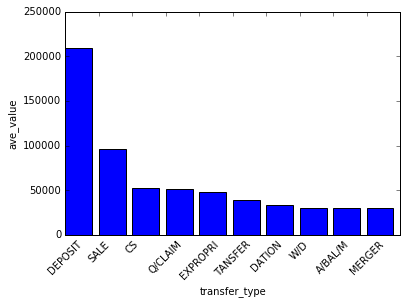

In [255]:
result=_
result.bar()

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

Option A:

For the fact table, whenever there is a new records come in, we have to update the fact table. But, for the dimension table we do not need to update that often, only when a unique combination comes up we have to update the dimension table. More specifically, for taxpayer_dimension, if there is a new taxpayer comes up or the a specific taxpayer change he/she address we have to update both fact table and taxpayer_dimension. We think in problem3, when we creating dimension tables we examine all columns and find out almost every possible data quality issue. We did a lot work on cleaning the data using several sql techniques. The queries we used in cleaning data are more general, which means we can use thoes queries to deal with future data so we think we can relatively easily automate the data cleaning steps. We think we need humans to be involved in data cleaning steps. Because, we think our query did not cover every possible data issues, so if there are some new data quality issue comes up, we have to change the query correspond. On the whole we can automate the process of choosing dimensions like similar columns ( taxpayer name, city , state etc) but the whole process needs some amount of human intervention to make sure it not error prone. 


#### BOTH THE TEAM MEMBERS WORKED EQUALLY TO COMPLETE THE PROJECT-2. WE ALWAYS WORKED TOGETHER AS A GROUP TO ACHEIVE THIS TASK.

THANK YOU